# Visualization

Visualization is a crucial skill in data science. The most common practice libraries in Python are matplotlib, seaborn, and so on... Before creating a fashion graph, did you know what data format you need to organize for visualization? There were many times that I wanted to display a graph that I had done before, but the error message came out because of the wrong data format. It will be very frustrating, especially in an interview. In this notebook, I will walk you through kinds of graphs and show the data format by classical data 'Titanic'.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

Titanic Data: https://www.kaggle.com/c/titanic/data

In [2]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Scatter Plot

Age x Fare

In [3]:
scatter = data[['Age', 'Fare', 'Pclass']]
scatter

,Age,Fare,Pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3
...,...,...,...
886,27.0,13.0000,2
887,19.0,30.0000,1
888,NaN,23.4500,3
889,26.0,30.0000,1


Text(0.5, 1.0, 'Age x Fare')

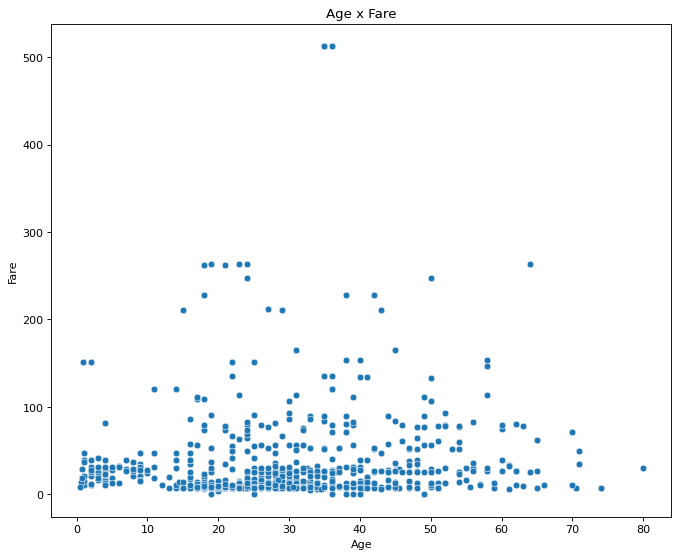

In [4]:
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(data=scatter, x='Age', y='Fare')
plt.title('Age x Fare')

Age x Fare x Pclass

Text(0.5, 1.0, 'Age x Fare x Pclass')

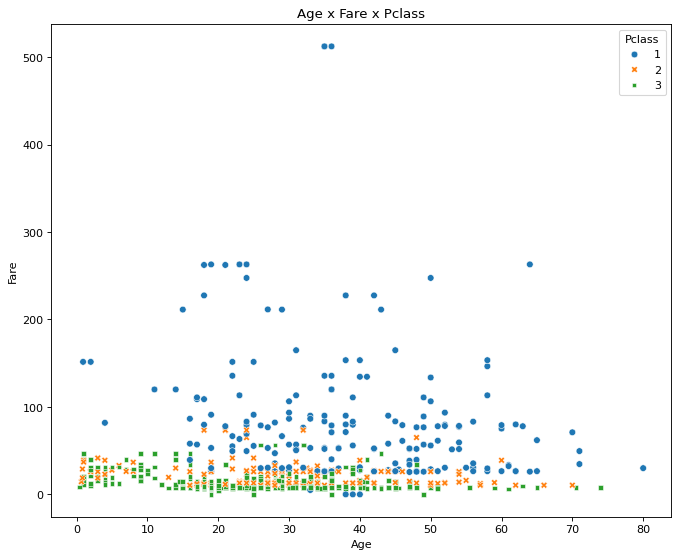

In [5]:
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(data=scatter, x='Age', y='Fare', hue='Pclass', palette='tab10', style='Pclass')
plt.title('Age x Fare x Pclass')

## Line Plot

Age Segment x Survived Rate

In [6]:
line = data
age_bins = np.arange(0, 110, 10)
label = np.arange(0, 100, 10)
line['age_bin'] = pd.cut(line['Age'], bins=age_bins, include_lowest=True, labels=label)
line = line.groupby(['age_bin']).Survived.apply(lambda x: round(x.sum() / x.count() * 100, 2)).reset_index()
line

,age_bin,Survived
0,0,59.38
1,10,38.26
2,20,36.52
3,30,44.52
4,40,38.37
5,50,40.48
6,60,23.53
7,70,20.00
8,80,NaN
9,90,NaN


Text(0.5, 1.0, 'Age Segment x Survived Rate')

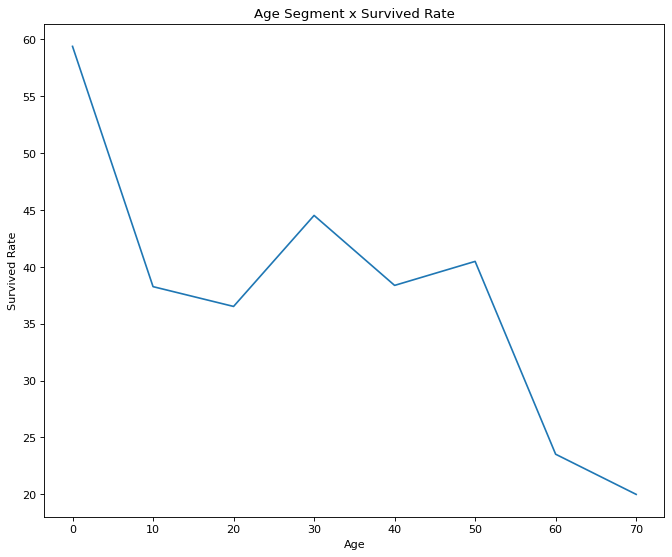

In [7]:
plt.figure(figsize=(10, 8), dpi=80)
sns.lineplot(data=line, x='age_bin', y='Survived')
plt.ylabel('Survived Rate')
plt.xlabel('Age')
plt.title('Age Segment x Survived Rate')

Age Segment x Sex x Survived Rate

In [8]:
line = data
age_bins = np.arange(0, 110, 10)
label = np.arange(0, 100, 10)
line['age_bin'] = pd.cut(line['Age'], bins=age_bins, include_lowest=True, labels=label)
line = line.groupby(['Sex', 'age_bin']).Survived.apply(lambda x: round(x.sum() / x.count() * 100, 2)).reset_index()
line

,Sex,age_bin,Survived
0,female,0,61.29
1,female,10,73.91
2,female,20,75.31
3,female,30,83.64
4,female,40,67.74
5,female,50,92.86
6,female,60,100.00
7,female,70,NaN
8,female,80,NaN
9,female,90,NaN


Text(0.5, 1.0, 'Age Segment x Survived Rate x Sex')

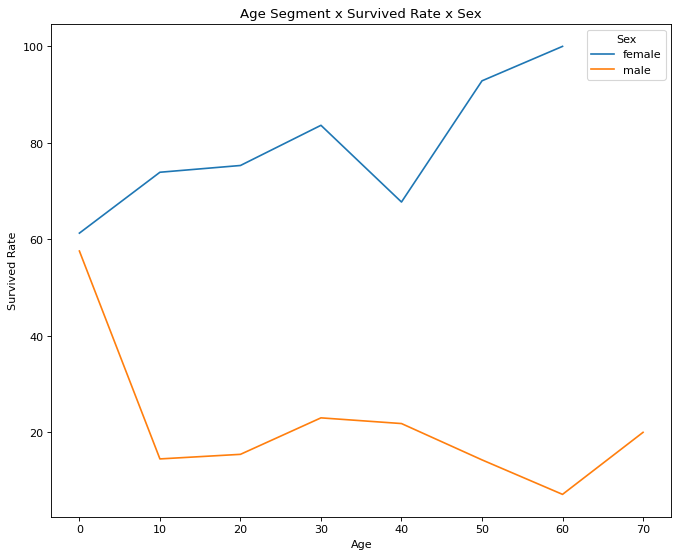

In [9]:
plt.figure(figsize=(10, 8), dpi=80)
sns.lineplot(data=line, x='age_bin', y='Survived', hue='Sex')
plt.ylabel('Survived Rate')
plt.xlabel('Age')
plt.title('Age Segment x Survived Rate x Sex')

### Add Text

Text(0.5, 1.0, 'Age Segment x Survived Rate x Sex')

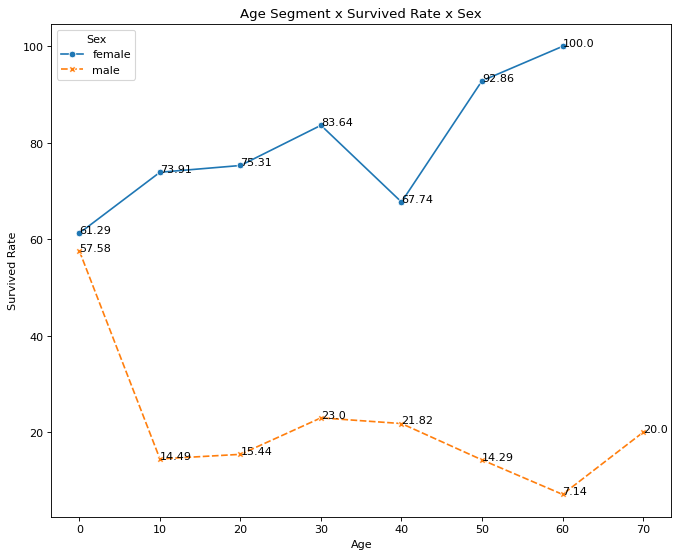

In [10]:
plt.figure(figsize=(10, 8), dpi=80)
sns.lineplot(data=line, x='age_bin', y='Survived', hue='Sex', style='Sex', markers=True)
for i in range(0, len(line)):
    if not np.isnan(line.loc[i, 'Survived']):
        plt.text(x=line.at[i, 'age_bin'], y=line.at[i, 'Survived'], s=line.at[i, 'Survived'])
plt.ylabel('Survived Rate')
plt.xlabel('Age')
plt.title('Age Segment x Survived Rate x Sex')

## Bar Plot

### Normal

Sex Population bar

In [11]:
bar = data.groupby('Sex').PassengerId.count().reset_index()
bar 

,Sex,PassengerId
0,female,314
1,male,577


Text(0.5, 1.0, 'Sex Population')

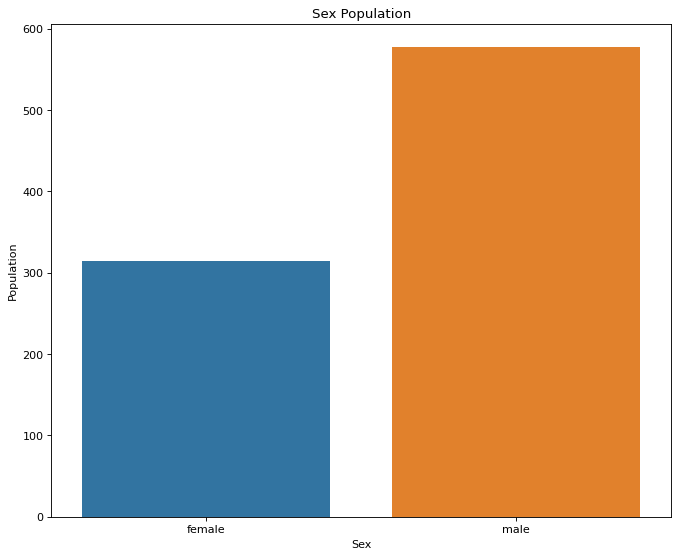

In [12]:
plt.figure(figsize=(10, 8), dpi=80)
ax = sns.barplot(bar, x='Sex', y='PassengerId', hue='Sex')
plt.ylabel('Population')
plt.xlabel('Sex')
plt.title('Sex Population')

### Add Text

Text(0.5, 1.0, 'Sex Population')

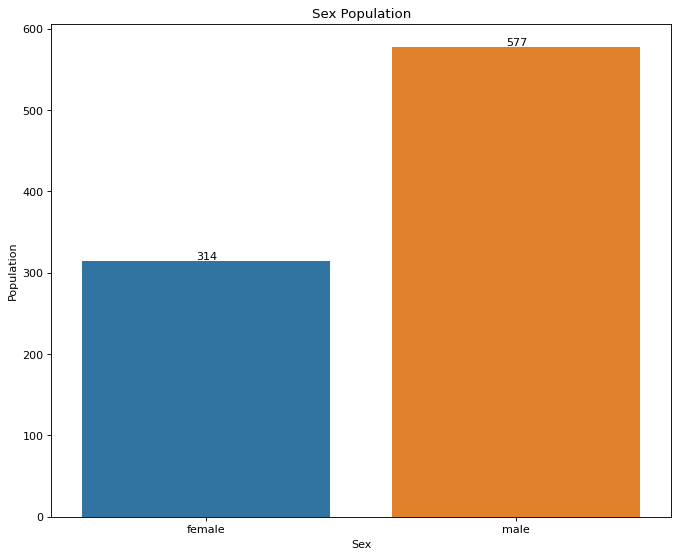

In [13]:
plt.figure(figsize=(10, 8), dpi=80)
ax = sns.barplot(bar, x='Sex', y='PassengerId', hue='Sex')
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize=10)
plt.ylabel('Population')
plt.xlabel('Sex')
plt.title('Sex Population')

Sex x Age Segment

In [14]:
stacked_bar = data.groupby(['Sex', 'age_bin']).PassengerId.count()
ratio = stacked_bar.groupby(level=0).apply(lambda x: round(x / x.sum() * 100, 2)).values
stacked_bar =stacked_bar.reset_index()
stacked_bar['ratio'] = ratio
stacked_bar

,Sex,age_bin,PassengerId,ratio
0,female,0,31,11.88
1,female,10,46,17.62
2,female,20,81,31.03
3,female,30,55,21.07
4,female,40,31,11.88
5,female,50,14,5.36
6,female,60,3,1.15
7,female,70,0,0.00
8,female,80,0,0.00
9,female,90,0,0.00


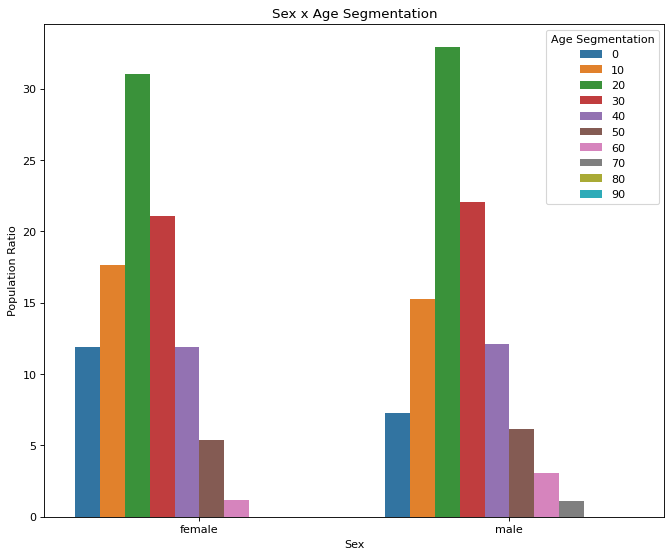

In [15]:
plt.figure(figsize=(10, 8), dpi=80)
sns.barplot(data=stacked_bar, x='Sex', y='ratio', hue='age_bin')
plt.ylabel('Population Ratio')
plt.xlabel('Sex')
plt.title('Sex x Age Segmentation')
plt.legend(title='Age Segmentation')

### Stacked

In [16]:
stacked_bar_ver = stacked_bar.pivot_table(index='Sex', columns='age_bin', values='ratio')
stacked_bar_ver

age_bin,0,10,20,30,40,50,60,70,80,90
Sex,,,,,,,,,,
female,11.88,17.62,31.03,21.07,11.88,5.36,1.15,0.0,0.0,0.0
male,7.28,15.23,32.89,22.08,12.14,6.18,3.09,1.1,0.0,0.0


<Figure size 800x640 with 0 Axes>

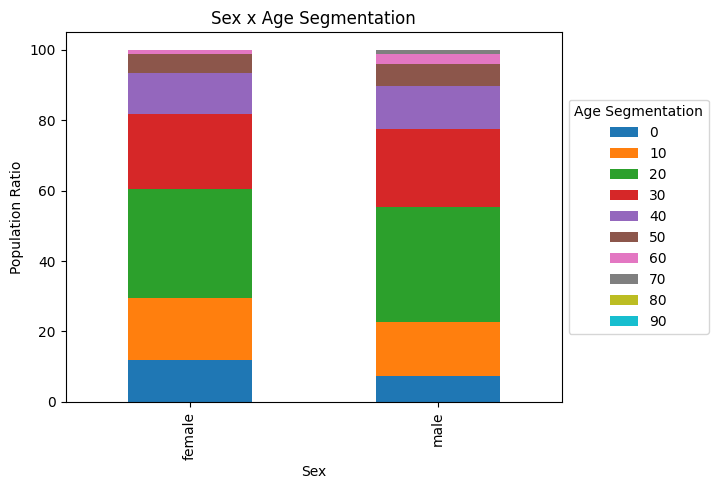

In [17]:
plt.figure(figsize=(10, 8), dpi=80)
stacked_bar_ver.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Population Ratio')
plt.xlabel('Sex')
plt.title('Sex x Age Segmentation')
plt.legend(title='Age Segmentation', loc='center left', bbox_to_anchor=(1, 0.5))

### Add Text

<Figure size 800x640 with 0 Axes>

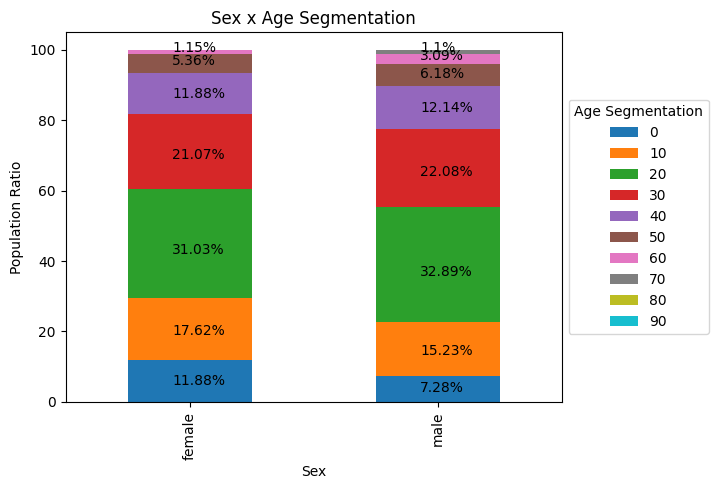

In [18]:
plt.figure(figsize=(10, 8), dpi=80)
stacked_bar_ver.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for id_s, s in enumerate(stacked_bar_ver.index):
    st = 0
    for a in stacked_bar_ver.columns:
        if stacked_bar_ver.at[s, a] != 0:
            plt.text(x=id_s - 0.07, y=st + stacked_bar_ver.at[s, a] * 0.4, s=str(stacked_bar_ver.at[s, a]) + '%')
            st += stacked_bar_ver.at[s, a]
plt.ylabel('Population Ratio')
plt.xlabel('Sex')
plt.title('Sex x Age Segmentation')
plt.legend(title='Age Segmentation', loc='center left', bbox_to_anchor=(1, 0.5))

## Histogram plot

Age Distribution

In [19]:
hist = data[['Sex', 'Age']]
hist

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


Text(0.5, 1.0, 'Age Distribution')

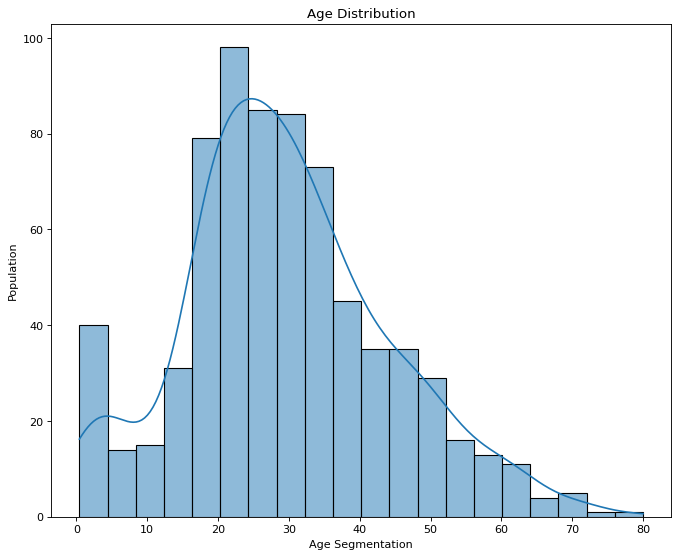

In [20]:
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot(data=hist, x='Age', kde=True)
plt.ylabel('Population')
plt.xlabel('Age Segmentation')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sex x Age Distribution')

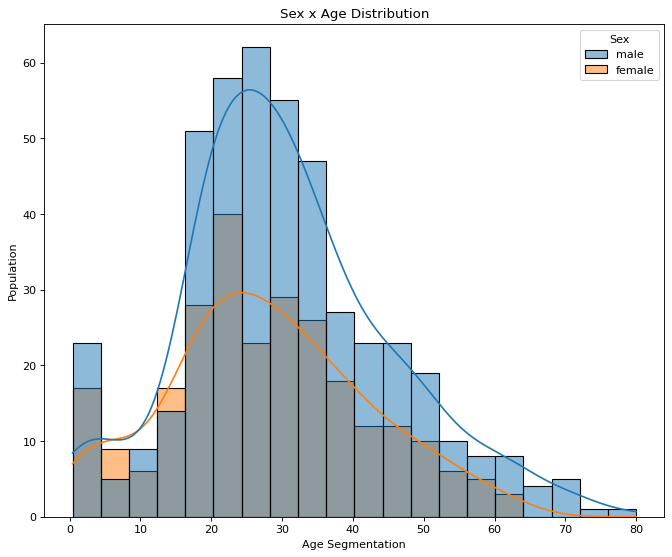

In [21]:
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot(data=hist, x='Age', kde=True, hue='Sex')
plt.ylabel('Population')
plt.xlabel('Age Segmentation')
plt.title('Sex x Age Distribution')

## Box plot

Pclass x Age

In [22]:
box = data[['Pclass', 'Age']]
box

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


Text(0.5, 1.0, 'Pclass x Age')

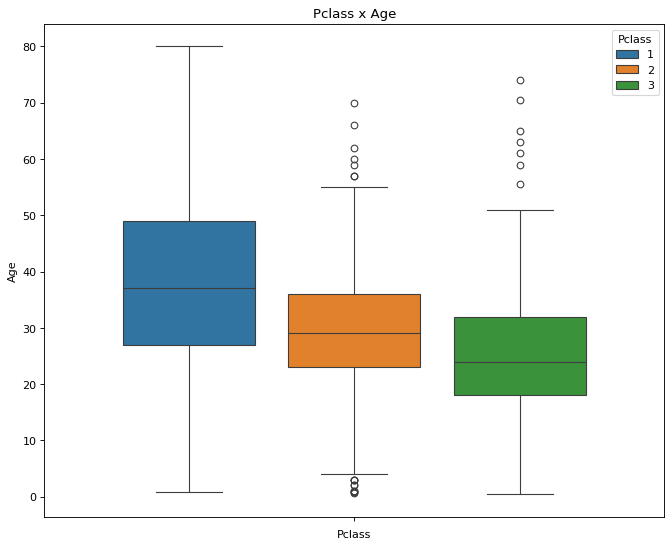

In [23]:
plt.figure(figsize=(10, 8), dpi=80)
sns.boxplot(data=data, y='Age', hue='Pclass', palette='tab10', gap=.2)
plt.ylabel('Age')
plt.xlabel('Pclass')
plt.title('Pclass x Age')

## Pie Plot

Sex Ratio

In [24]:
pie = data.groupby('Sex').PassengerId.count()
pie = round(pie / pie.sum() * 100, 2).reset_index()
pie

,Sex,PassengerId
0,female,35.24
1,male,64.76


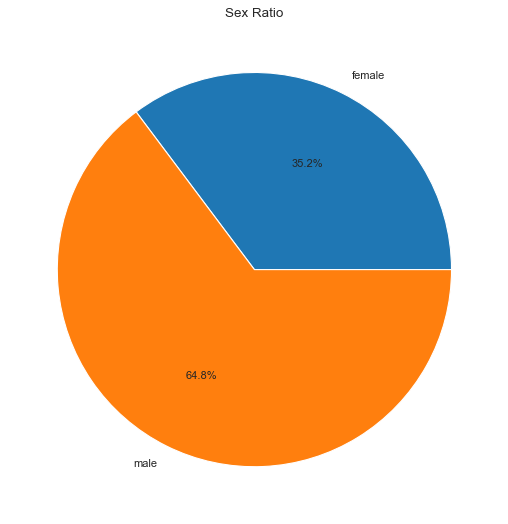

In [25]:
plt.figure(figsize=(10, 8), dpi=80)
sns.set_style("whitegrid")
plt.pie(pie['PassengerId'], labels=pie['Sex'], autopct='%1.1f%%')
plt.title('Sex Ratio')
sns.set_style("white")

## Heatmap

Age x Pclass x Survived Rate

In [26]:
heatmap = data.groupby(['Pclass', 'age_bin']).Survived.apply(lambda x: round(x.sum() / x.count() * 100, 2)).reset_index()
heatmap = heatmap.pivot_table(index='Pclass', columns='age_bin', values='Survived')
heatmap

age_bin,0,10,20,30,40,50,60,70
Pclass,,,,,,,,
1,66.67,83.33,72.50,75.51,56.76,60.00,18.18,33.33
2,100.00,50.00,40.98,44.19,52.63,16.67,33.33,NaN
3,43.18,25.32,23.26,20.63,6.67,0.00,33.33,0.00


Text(0.5, 1.0, 'Age x Pclass x Survived Rate')

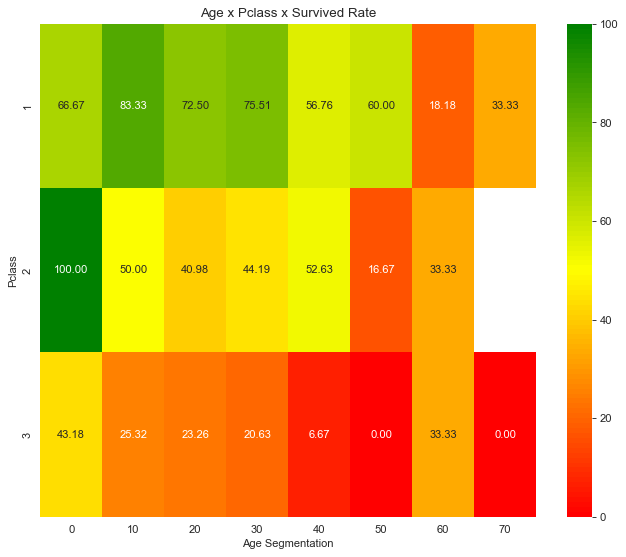

In [27]:
import matplotlib.colors as mcolors
# Define colormap from green (high engagement) to red (low engagement)
cmap = mcolors.LinearSegmentedColormap.from_list("green_red", ["red", "yellow", "green"], N=100)
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(heatmap, cmap=cmap, annot=True, fmt='.2f')
plt.ylabel('Pclass')
plt.xlabel('Age Segmentation')
plt.title('Age x Pclass x Survived Rate')

## Regressoin Plot

In [28]:
import math

reg_plot =  data[['Age', 'Fare']]
reg_plot['log_Fare'] = reg_plot['Fare'].apply(lambda x: math.log1p(x))
reg_plot

,Age,Fare,log_Fare
0,22.0,7.2500,2.110213
1,38.0,71.2833,4.280593
2,26.0,7.9250,2.188856
3,35.0,53.1000,3.990834
4,35.0,8.0500,2.202765
...,...,...,...
886,27.0,13.0000,2.639057
887,19.0,30.0000,3.433987
888,NaN,23.4500,3.196630
889,26.0,30.0000,3.433987


Text(0.5, 1.0, 'Age x Log Fare Regression')

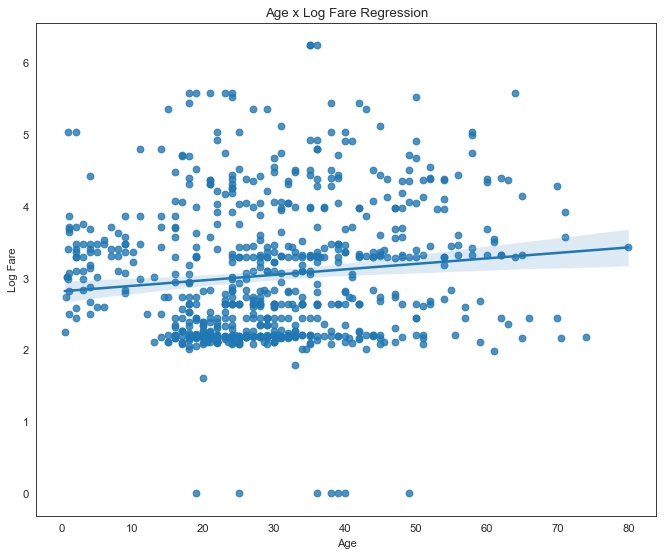

In [29]:
plt.figure(figsize=(10, 8), dpi=80)
sns.regplot(data=reg_plot, x='Age', y='log_Fare')
plt.ylabel('Log Fare')
plt.xlabel('Age')
plt.title('Age x Log Fare Regression')

## Sub Plots

### 3 plots

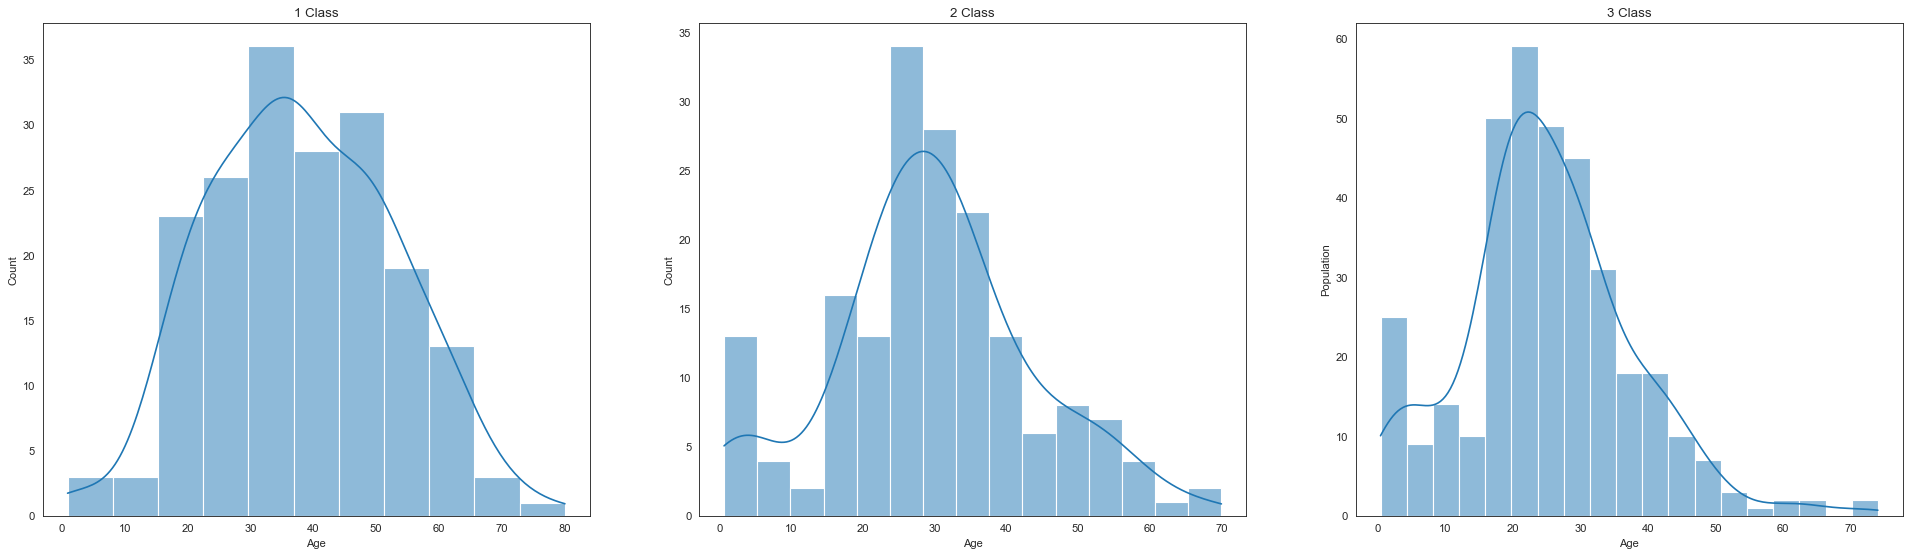

In [30]:
fig, axes = plt.subplots(1, 3, figsize = (30, 8), dpi=80)
pclass = data['Pclass'].unique()
pclass.sort()
for i, j in enumerate(pclass):
    sns.histplot(data=data.loc[data['Pclass']==j], x='Age', kde=True, ax=axes[i]).set_title(f'{j} Class')
    plt.ylabel('Population')
    plt.xlabel('Age')

### 4 plots

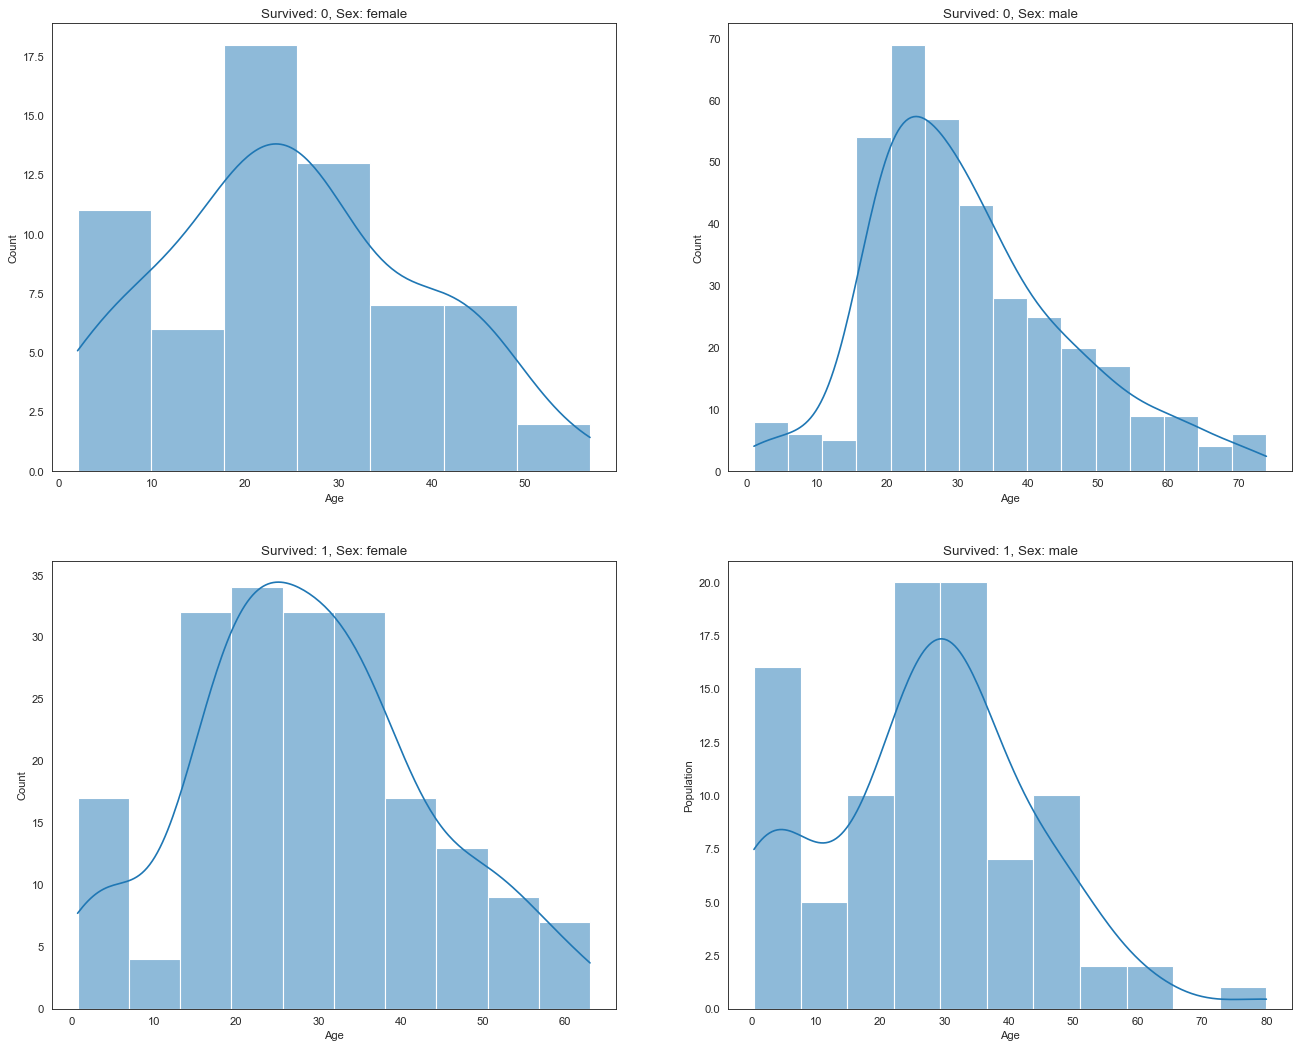

In [31]:
fig, axes = plt.subplots(2, 2, figsize = (20, 16), dpi=80)
sex = data['Sex'].unique()
sex.sort()
survived = data['Survived'].unique()
survived.sort()
for h, k in enumerate(survived):
    for i, j in enumerate(sex):
        sns.histplot(data=data.loc[(data['Sex'] == j) & (data['Survived'] == k)], x='Age', kde=True, ax=axes[h][i]).set_title(f'Survived: {k}, Sex: {j}')
        plt.ylabel('Population')
        plt.xlabel('Age')

## Twin y axis

In [32]:
twin_y = data.groupby(['age_bin']).agg({'PassengerId':'count', 'Fare':'mean'}).reset_index()
twin_y = twin_y.loc[twin_y['Fare'].notnull()]
twin_y['age_bin'] = twin_y['age_bin'].astype('str')
twin_y

,age_bin,PassengerId,Fare
0,0,64,30.434439
1,10,115,29.529531
2,20,230,28.306719
3,30,155,42.496100
4,40,86,41.163181
5,50,42,44.774802
6,60,17,45.910782
7,70,5,25.936680


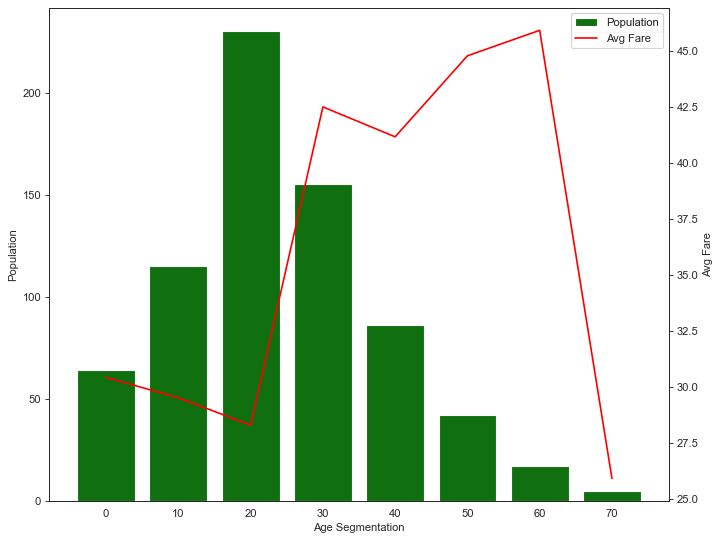

In [33]:
plt.figure(figsize=(10, 8), dpi=80)
ax = sns.barplot(data=twin_y, x='age_bin', y='PassengerId', color='green', label='Population')
plt.xlabel('Age Segmentation')
plt.ylabel('Population')
ax2 = ax.twinx()
sns.lineplot(data=twin_y, x='age_bin', y='Fare', color='red', ax=ax2, label='Avg Fare')
plt.ylabel('Avg Fare')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

## Powerful Plots

There are four kinds of powerful plots in seaborn:
1. relplot
2. displot
3. catplot
4. lmplot
5. pairplot

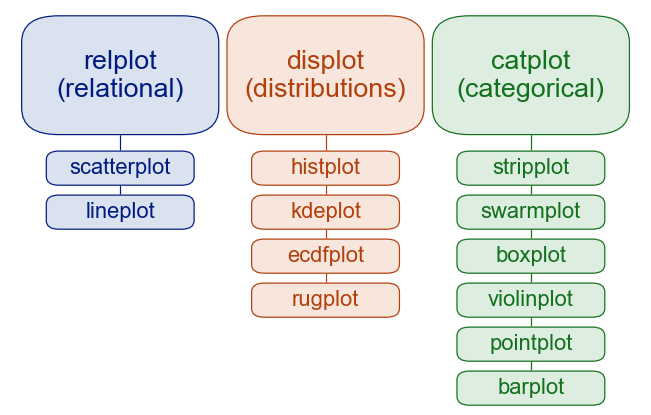

### Relplot

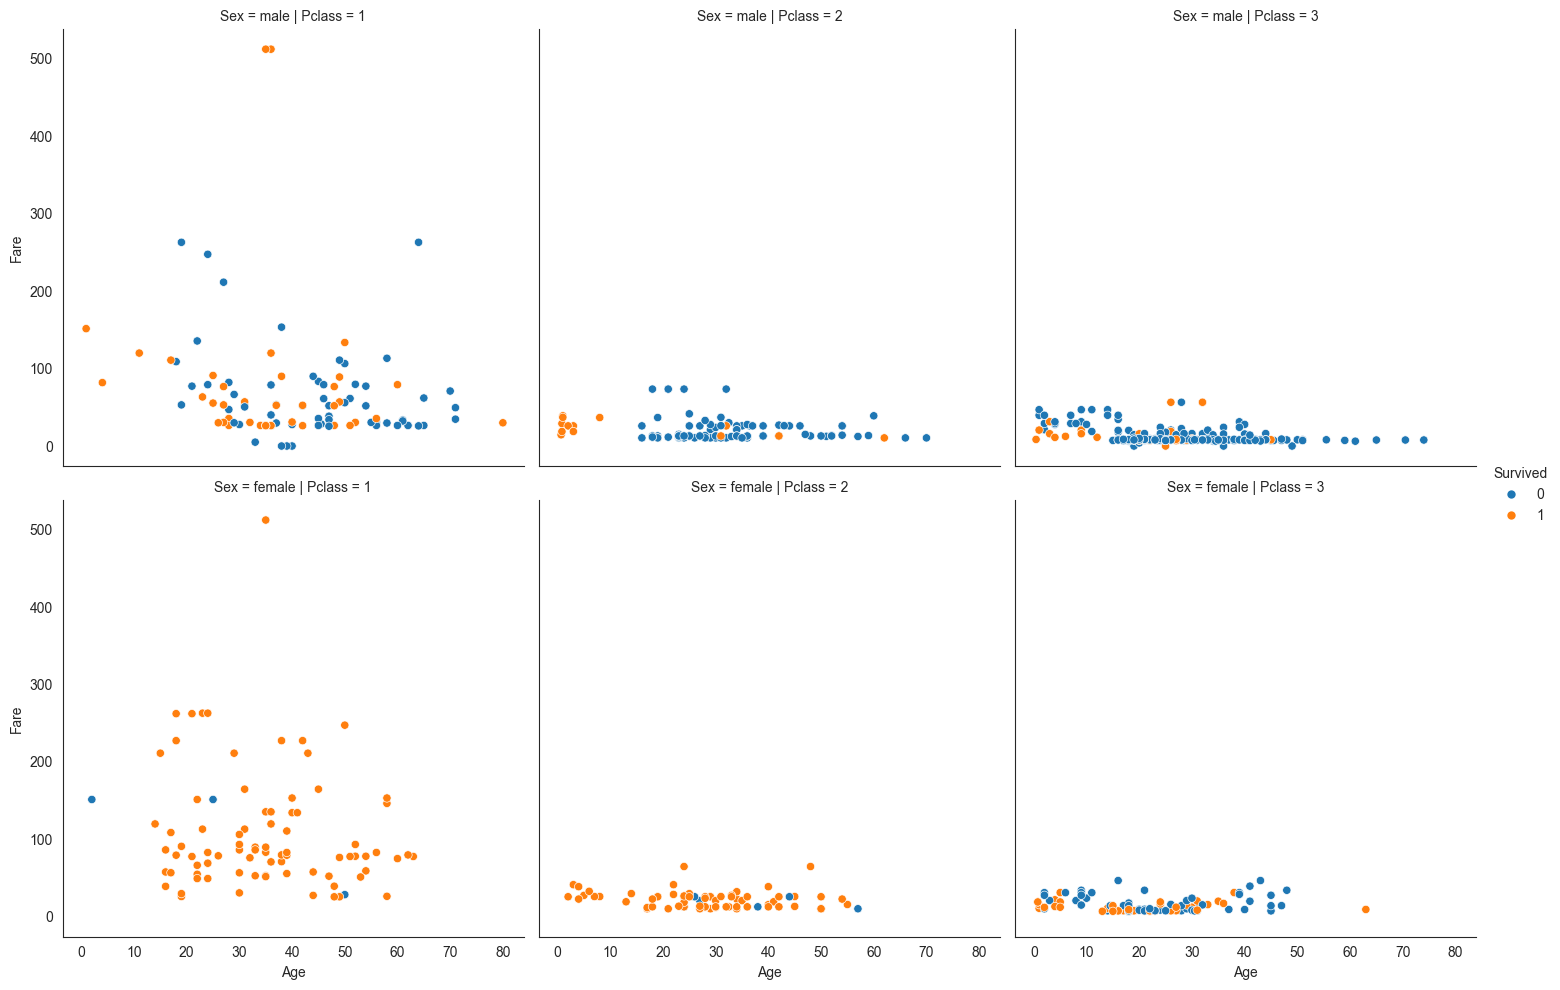

In [34]:
sns.relplot(data=data, x='Age', y='Fare', hue='Survived', col='Pclass', row='Sex')

### Displot

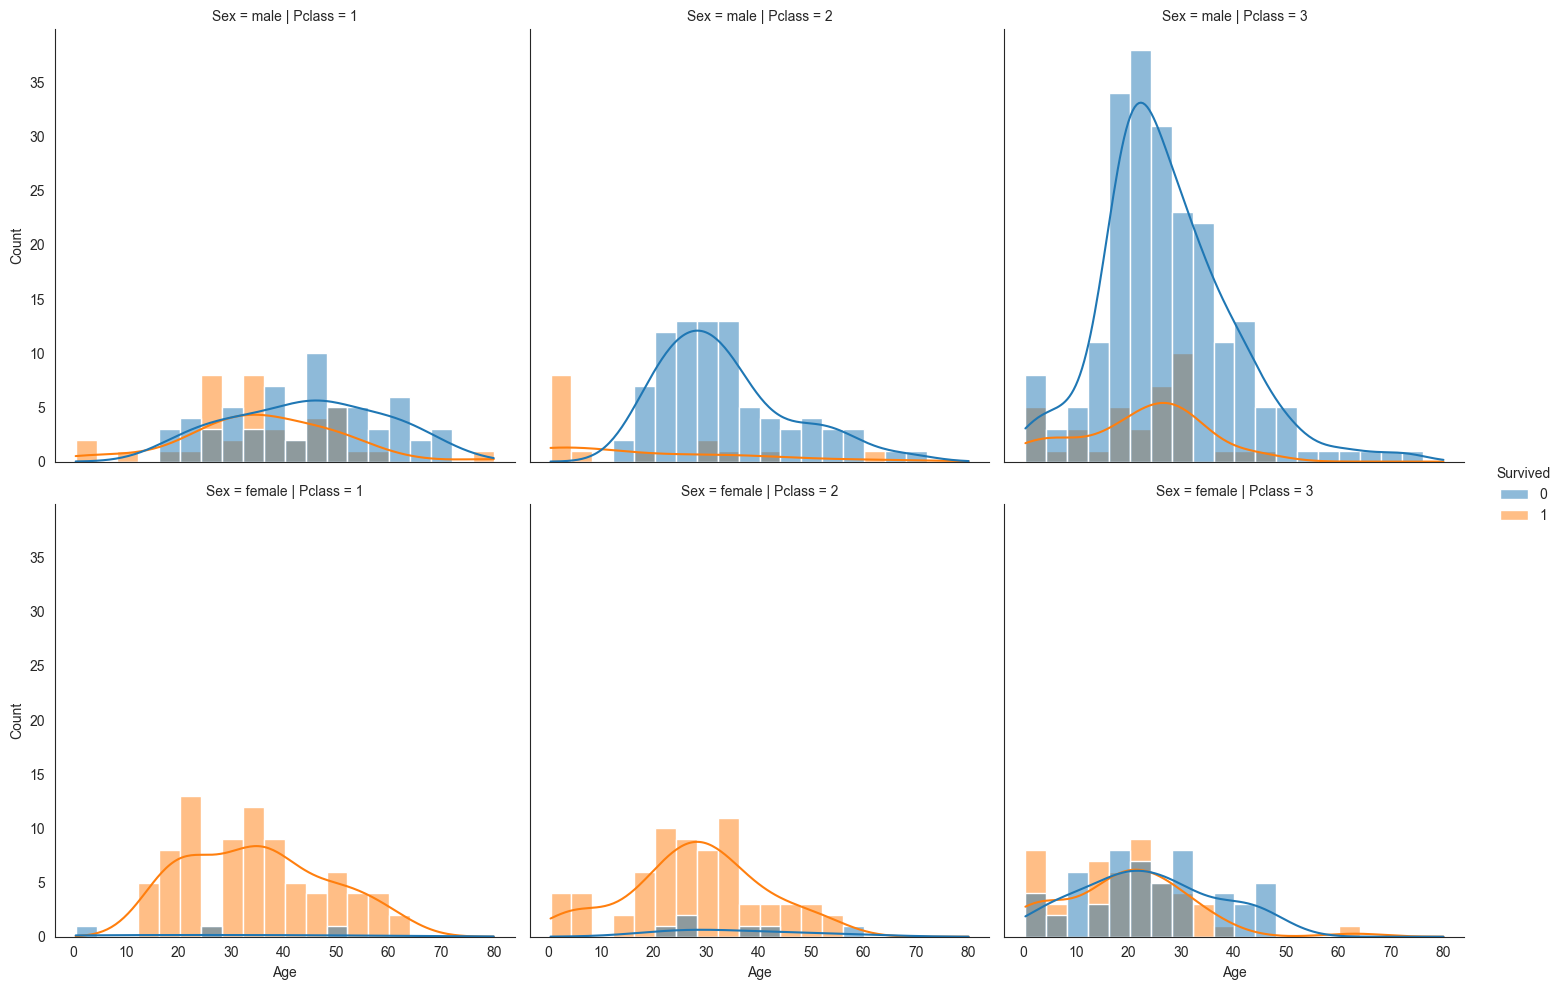

In [35]:
sns.displot(data=data, x='Age', hue='Survived', col='Pclass', row='Sex', kde=True)

### Catplot

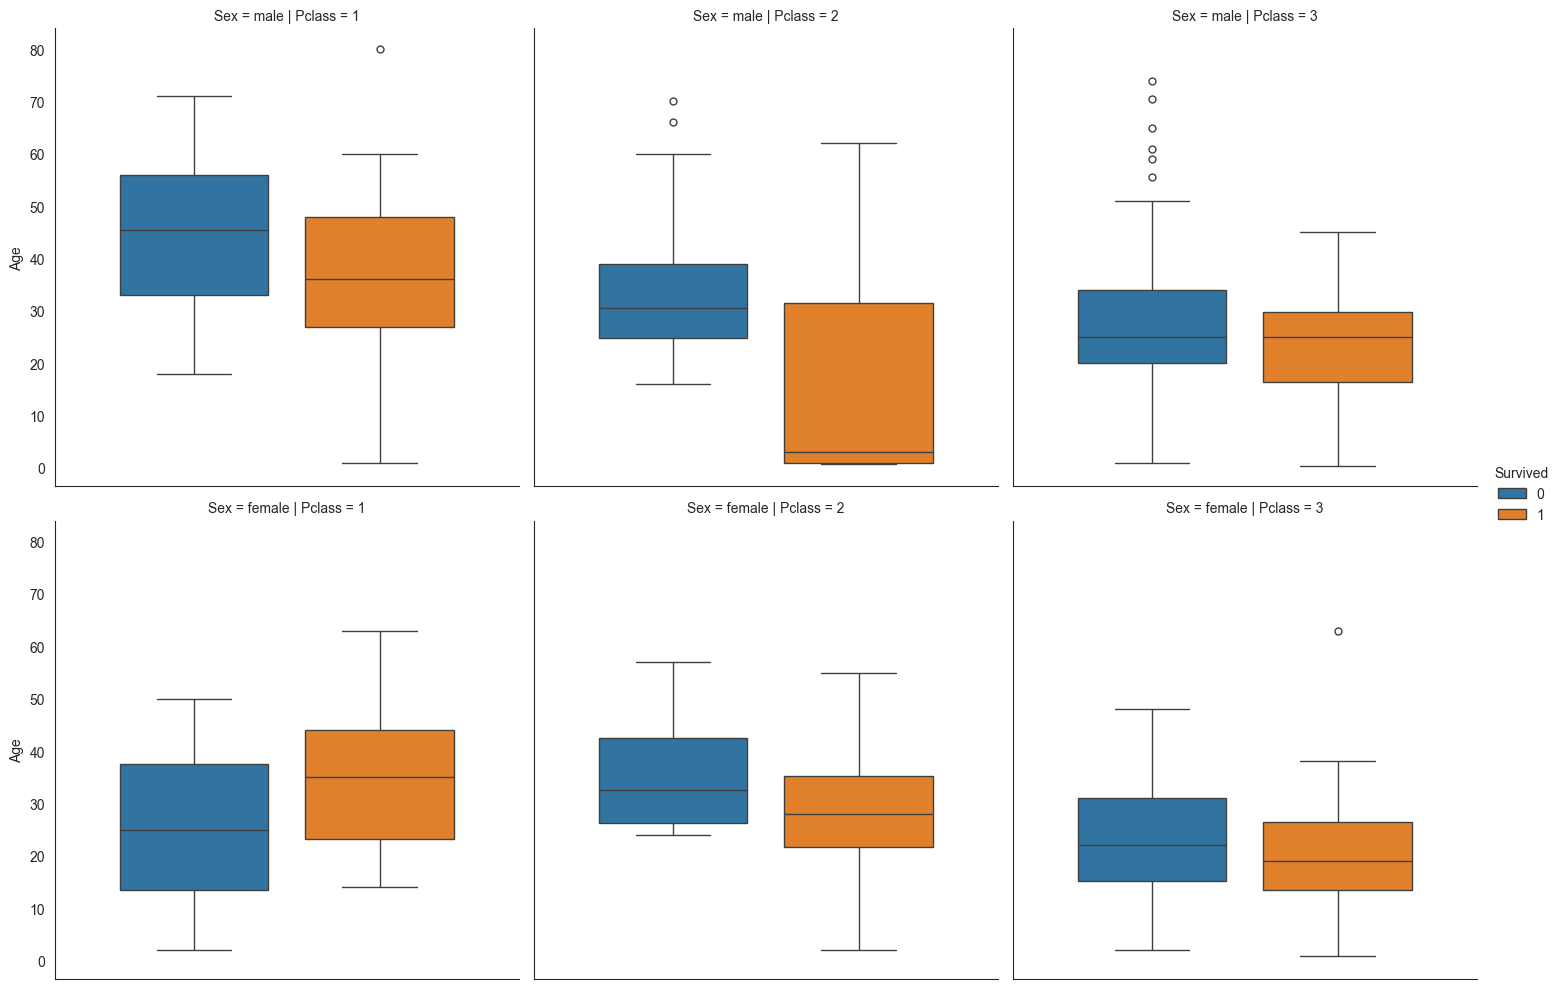

In [36]:
sns.catplot(data=data, y='Age', hue='Survived', col='Pclass', row='Sex', kind='box', gap=.2)

### Lmplot

In [37]:
lm_plot =  data[['Age', 'Fare', 'Survived', 'Pclass', 'Sex']]
lm_plot['log_Fare'] = lm_plot['Fare'].apply(lambda x: math.log1p(x))
lm_plot['log_Age'] = lm_plot['Age'].apply(lambda x: math.log1p(x)) 
lm_plot

,Age,Fare,Survived,Pclass,Sex,log_Fare,log_Age
0,22.0,7.2500,0,3,male,2.110213,3.135494
1,38.0,71.2833,1,1,female,4.280593,3.663562
2,26.0,7.9250,1,3,female,2.188856,3.295837
3,35.0,53.1000,1,1,female,3.990834,3.583519
4,35.0,8.0500,0,3,male,2.202765,3.583519
...,...,...,...,...,...,...,...
886,27.0,13.0000,0,2,male,2.639057,3.332205
887,19.0,30.0000,1,1,female,3.433987,2.995732
888,NaN,23.4500,0,3,female,3.196630,NaN
889,26.0,30.0000,1,1,male,3.433987,3.295837


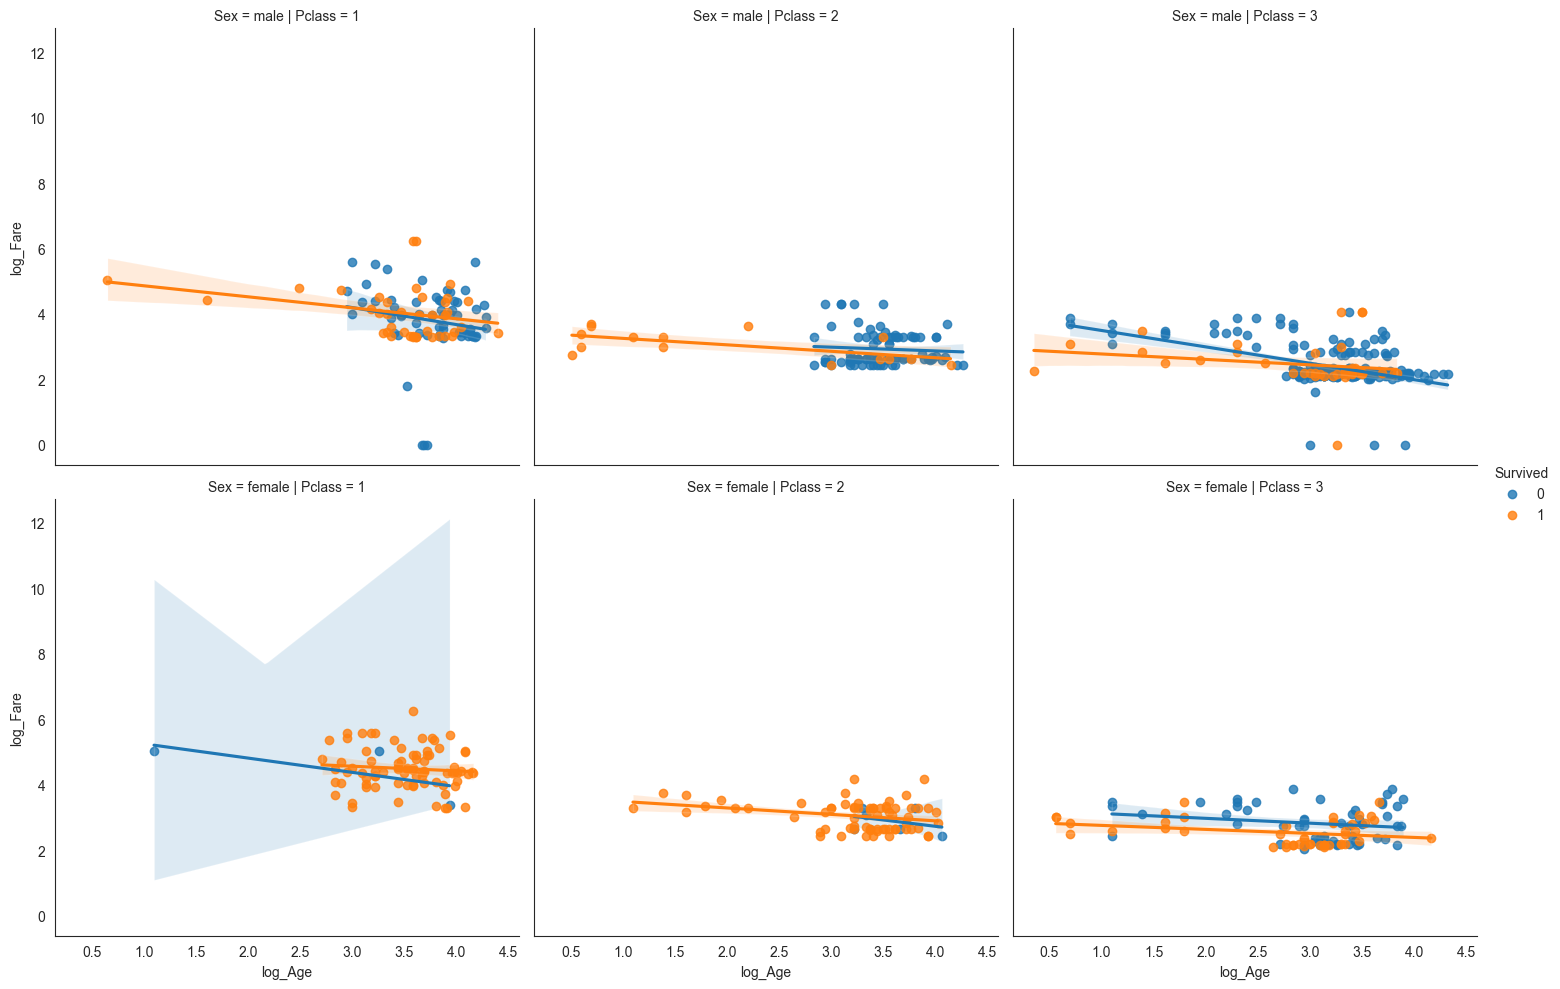

In [38]:
sns.lmplot(data=lm_plot, x='log_Age', y='log_Fare', hue='Survived', col='Pclass', row='Sex')

### Pairplot

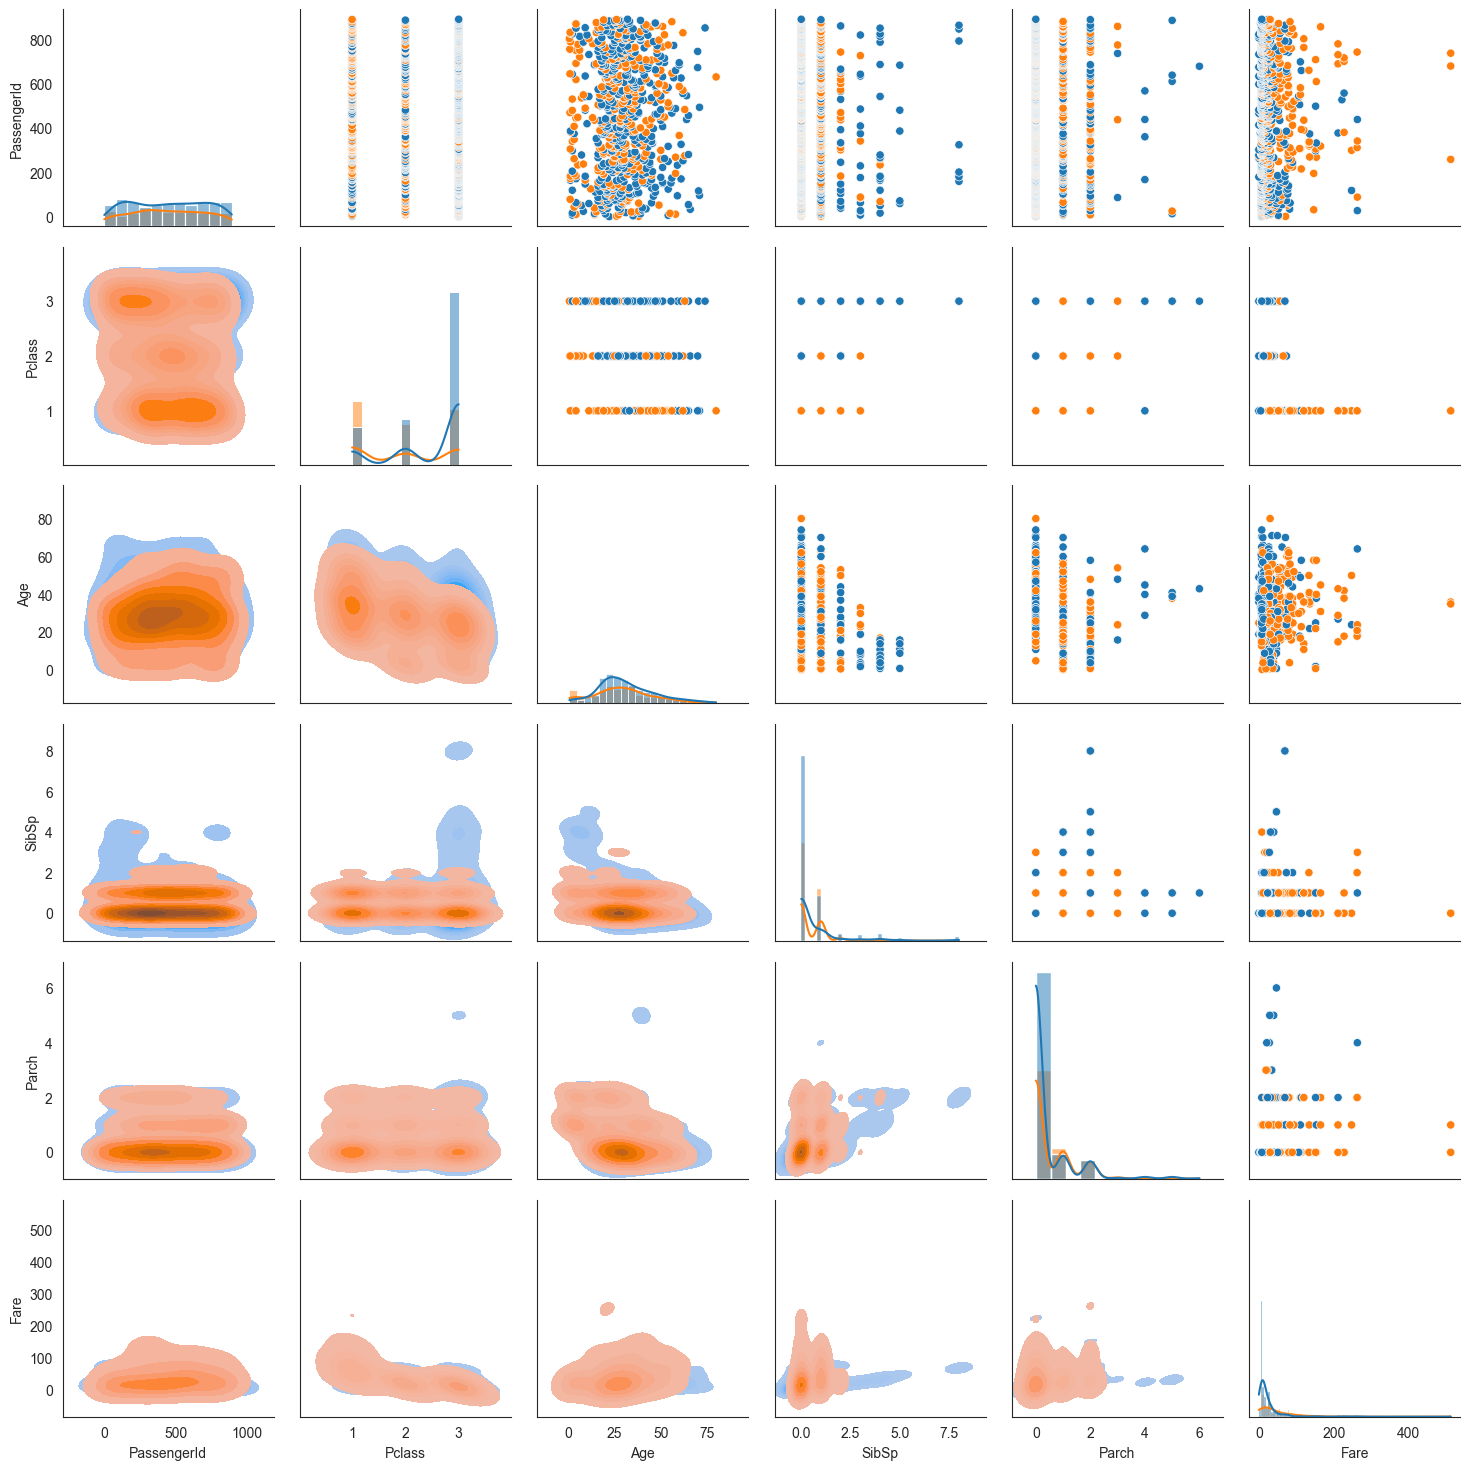

In [39]:
g = sns.PairGrid(data, hue='Survived')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)